In [ ]:
!git clone https://github.com/AshishJangra27/datasets


Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


In [ ]:
import pandas as pd


#**Dataset 1 - Gaana.com**

In [ ]:
df = pd.read_csv('/content/datasets/Gaana/songs.csv')


###**Exploring the Dataset**

In [ ]:
df.head(10)

###**Checking NULL Values**

In [ ]:
df.isnull().sum() # => no null value present so no need to think about replacing or something

,0
name,0
singer,0
singer_id,0
duration,0
link,0
language,0


###**Checking for Duplicates**


In [ ]:
print(df.duplicated('link').sum()) # 4994 duplicate songs in the list

df[df.duplicated('link')]['language'].value_counts() # Realising the OLD column is a full copy of hindi songs

4994


,count
language,
Old,4993
Telugu,1


####**Removing the Duplicates**

In [ ]:
print(df.drop_duplicates(subset = 'link', inplace = True))
print(df['language'].value_counts()) # Removed the whole Old language but now 1 Telugu song is also there which need to be removed
print(df.duplicated('link').sum()) # no more duplicated songs
print(df['link'].nunique())

None
language
Telugu        4995
Hindi         4993
Marathi       4699
Tamil         4677
Punjabi       3818
Kannada       3559
Urdu          3116
Gujarati      2115
Bengali        958
Odia           940
Assamese       724
Rajasthani     541
Bhojpuri       519
Malayalam      479
Haryanvi       228
Name: count, dtype: int64
0
36361


###**Creating Duration in Seconds Column**


In [ ]:
duration_in_seconds = []

for dur in df['duration']:
    parts = dur.split(':')
    if len(parts) == 2:  # Format is MM:SS
        minutes = int(parts[0])
        seconds = int(parts[1])
        total_seconds = minutes * 60 + seconds
    elif len(parts) == 3:  # Format is HH:MM:SS
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2])
        total_seconds = hours * 3600 + minutes * 60 + seconds
    else:
        raise ValueError(f"Invalid duration format: {dur}")

    duration_in_seconds.append(total_seconds)

# Add the new column to the DataFrame
df['duration_in_seconds'] = duration_in_seconds

df.sort_values(by = 'duration_in_seconds', ascending = False)

,name,singer,singer_id,duration,link,language,duration_in_seconds
16093,Haye Tumba,Dilshad Akhtar,/artist/dilshad-akhtar,07:08:00,/haye-tumba,Punjabi,25680
16352,Bum Bum Lahiri,Dilshad Akhtar,/artist/dilshad-akhtar,06:52:00,/bum-bum-lahiri,Punjabi,24720
15000,Bum Bum Lahiri,Dilshad Akhtar,/artist/dilshad-akhtar,06:52:00,/bum-bum-lahiri-1,Punjabi,24720
15025,Kanu Atharu Bahoundi,Dilshad Akhtar,/artist/dilshad-akhtar,06:04:00,/kanu-atharu-bahoundi,Punjabi,21840
14624,Desi Bandri Vilayati Cheekan,Dilshad Akhtar,/artist/dilshad-akhtar,06:03:00,/desi-bandri-vilayati-cheekan-1,Punjabi,21780
...,...,...,...,...,...,...,...
9480,Sppech By Sabapathipillai,S. GOVINDARAJAN,/artist/s-govindarajan-1,00:19,/sppech-by-sabapathipillai,Tamil,19
36778,Introduction Telegu Films Idi Mallelavela,K. Murari,/artist/k-murari,00:18,/introduction-telegu-films-idi-mallelavela,Telugu,18
6500,Dialogues,Savitri|Sivaji Ganesan|Nagesh|K. R. Vijaya|R. ...,/artist/savitri|/artist/sivaji-ganesan|/artist...,00:18,/dialogues-185,Tamil,18
35561,Title Musics - Jagadekaveeruni Katha,Gurucharan,/artist/gurucharan,00:17,/title-musics,Telugu,17


###**Adding a Column with the Number od Singers in the song**

In [ ]:
df['no_of_singers'] = df['singer'].str.split('|').str.len()
df

###**Sample Questions**

In [ ]:
# number of sings in hindi
print(len(df[df['language'] == 'Hindi']))

# singles by Jagjit Singh
print(len(df[df['singer'] == 'Jagjit Singh']))

# Total unique songs
print(len(df['link'].unique())) # we dont use name because if link is diferent the song is definitely different

# language with maximum number of songs
print(df['language'].value_counts().head(1).index[0])

# singer with maximum solo
print(df['singer'].value_counts().idxmax())

# songs of Jagjit Singh in Urdu
print(len(df[(df['singer'] == 'Jagjit Singh') & (df['language'] == 'Urdu')]))

# average length of songs in Hindi
print(int(df[df['language']== 'Hindi']['duration_in_seconds'].mean()))

# top 10 singers with maximum singles
df['no_of_singers'] = df['singer'].str.split('|').str.len()
print(df[df['no_of_singers'] == 1]['singer'].value_counts().head(10))

# number of song with the maximum number of singers
print(df.sort_values(by = 'no_of_singers', ascending = False).head(1)) # check

# total number of songs by Jagjit Singh
print((df['singer_id'].str.split('|').explode() == '/artist/jagjeet-singh-1').sum())

# language with maximum average length of songs
print(df.groupby('language')['duration_in_seconds'].mean().idxmax())


<Axes: xlabel='language'>

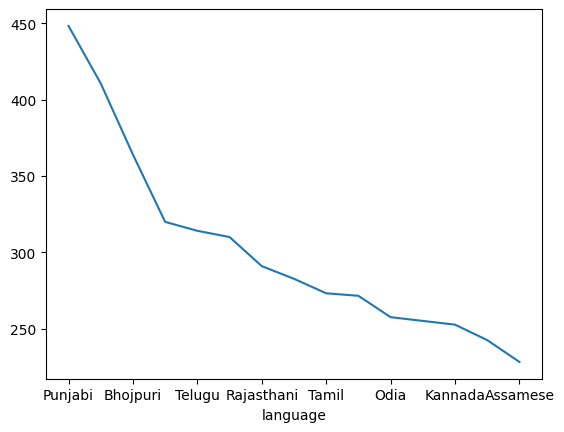

In [ ]:
df.groupby('language')['duration_in_seconds'].mean().sort_values(ascending = False).plot(kind = 'line')